In [1]:
# import required libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load the data

train_data= pd.read_csv('Airbnb_train_cleandata.csv')
test_data= pd.read_csv('Airbnb_test_cleandata.csv')


In [3]:
test_data.columns

Index(['city_Chicago', 'city_DC', 'city_LA', 'city_NYC', 'city_SF',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'bed_type_Couch',
       'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'room_type_Private room', 'room_type_Shared room',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Boutique hotel', 'property_type_Bungalow',
       'property_type_Cabin', 'property_type_Camper/RV',
       'property_type_Casa particular', 'property_type_Castle',
       'property_type_Cave', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Earth House', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Hut', 'property_type_In-law',
       'property_type_Loft', 'property_type_Other',
       'prope

In [4]:
#Split data into train and test data 

train=train_data.drop('id',axis=1) 
test=test_data.drop('id',axis=1)

x = train.drop('log_price', axis = 1)
y = train['log_price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 1)


In [5]:
test.shape, train.shape

((24111, 60), (49999, 61))

In [6]:
x

,city_Chicago,city_DC,city_LA,city_NYC,city_SF,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,bed_type_Couch,...,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,last_review_years,host_since_years
0,0,0,0,1,0,0,1,0,0,0,...,1,1,100.0,0,2,100.0,1.0,1.0,5.0,9.0
1,0,0,0,1,0,0,1,0,0,0,...,1,0,100.0,1,6,93.0,3.0,3.0,4.0,4.0
2,0,0,0,1,0,1,0,0,0,0,...,1,1,100.0,1,10,92.0,1.0,3.0,4.0,5.0
3,0,0,0,0,1,0,0,0,0,0,...,1,1,100.0,0,0,100.0,2.0,2.0,4.0,6.0
4,0,1,0,0,0,1,0,0,0,0,...,1,1,100.0,1,4,40.0,0.0,1.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,0,0,0,1,0,0,0,0,0,0,...,1,1,100.0,0,1,100.0,1.0,1.0,4.0,5.0
49995,0,0,0,1,0,1,0,0,0,0,...,1,0,100.0,0,0,100.0,1.0,1.0,4.0,4.0
49996,0,0,0,1,0,0,1,0,0,0,...,1,1,93.0,1,150,82.0,2.0,3.0,4.0,10.0
49997,0,0,0,1,0,0,1,0,0,0,...,1,1,100.0,0,19,96.0,2.0,1.0,4.0,8.0


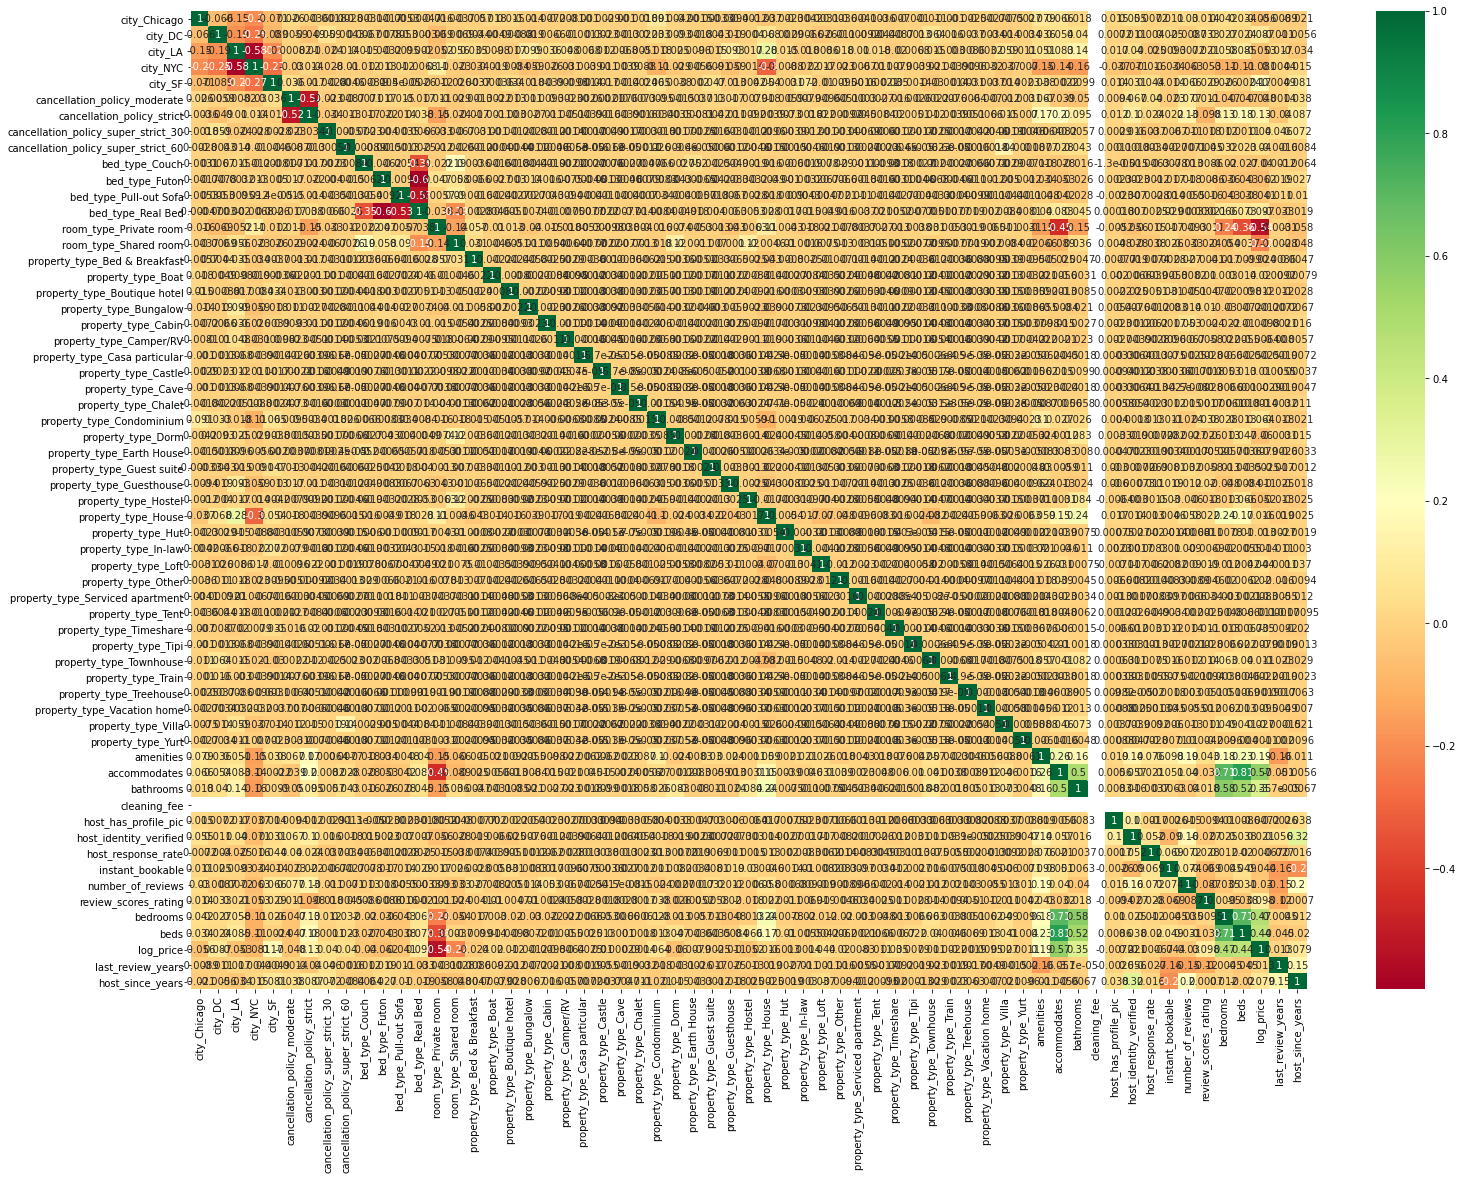

In [7]:
# Finds correlation between Independent and dependent attributes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (25,18))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [8]:
x_train.shape, y_train.shape

((39999, 60), (39999,))

In [9]:
x_test.shape, y_test.shape

((10000, 60), (10000,))

# 1. Decision Tree Regression

In [10]:
TreeRegressor = DecisionTreeRegressor(random_state=45)
TreeRegressor.fit(x_train, y_train)


#Fit model
y_pred_tree = TreeRegressor.predict(x_test)
ActualvsPredictedtree = pd.DataFrame({'Actual' : y_test, 'Predicted':y_pred_tree})
print(ActualvsPredictedtree)

         Actual  Predicted
8190   4.094345   4.343805
21714  4.828314   3.806662
6303   5.273000   4.812184
36238  4.905275   4.369448
1784   4.691348   5.010635
...         ...        ...
46898  7.492760   6.212606
32828  4.787492   5.220356
23871  4.248495   4.248495
19884  3.555348   3.555348
17694  4.605170   3.713572

[10000 rows x 2 columns]


In [11]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_tree))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_tree))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree)))

Mean Absolute Error: 0.47087649510120383
Mean Squared Error: 0.395398321806051
Root Mean Squared Error: 0.62880706246515


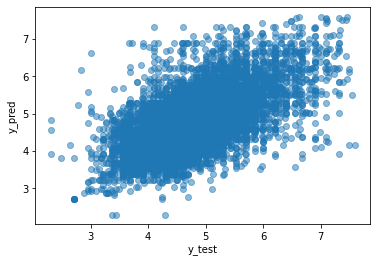

In [12]:
plt.scatter(y_test, y_pred_tree, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [13]:
#metrics
from sklearn.metrics import r2_score

r2=r2_score(y_test,y_pred_tree)

r2

0.22709539973382886

In [14]:
pred_test = TreeRegressor.predict(test)

In [15]:
pred_test

array([4.60517019, 5.43807931, 5.01063529, ..., 5.29831737, 4.59511985,
       4.48863637])

In [16]:
pd.DataFrame(list(zip(test_data['id'],pred_test)),columns=['id','log_price']).to_excel('mysubmission_dtree.xlsx', index=False,  header=True)

# 2. Randomforest algorithm

In [17]:
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)

y_pred=rf_model.predict(x_test)

In [18]:
from sklearn.metrics import r2_score

r2=r2_score(y_test,y_pred)

r2

0.5875522097163219

In [19]:
rf_model.score(x_train, y_train)

0.9371684136284356

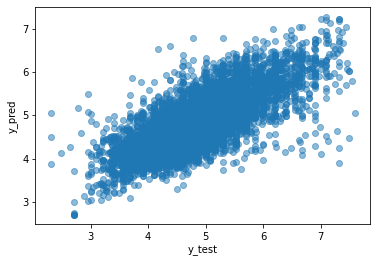

In [20]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [21]:
from sklearn import metrics

#Evaluate model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.34199937720305873
Mean Squared Error: 0.2109977920361955
Root Mean Squared Error: 0.4593449597374456


In [22]:
# Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [23]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [24]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = 1)

In [25]:
rf_random.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] n_estimators=390, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=390, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.7s
[CV] n_estimators=390, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s


[CV]  n_estimators=390, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.5s
[CV] n_estimators=463, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=463, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  12.9s
[CV] n_estimators=463, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=463, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  13.3s
[CV] n_estimators=172, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=172, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=  15.9s
[CV] n_estimators=172, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=172, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=  15.9s
[CV] n_estimators=209, min_samples_split

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  5.8min finished


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 136, 172, 209,
                                                         245, 281, 318, 354,
                                                         390, 427, 463, 500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [51]:
rf_random.best_params_

{'n_estimators': 427,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [52]:
prediction_rf = rf_random.predict(x_test)

In [53]:
prediction_rf

array([4.49345923, 4.57745715, 4.52867407, ..., 4.37362517, 3.3263318 ,
       4.29431638])

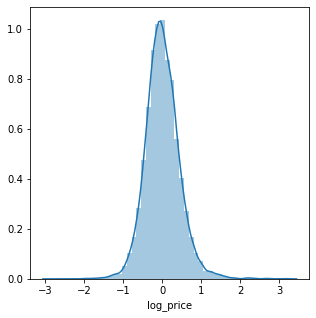

In [57]:
plt.figure(figsize = (5,5))
sns.distplot(y_test-prediction_rf)
plt.show()

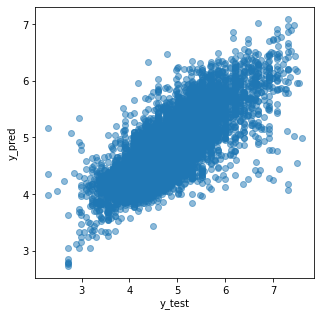

In [58]:
plt.figure(figsize = (5,5))
plt.scatter(y_test, prediction_rf, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [59]:
#Evaluate model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_rf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction_rf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_rf)))

Mean Absolute Error: 0.3310911684853433
Mean Squared Error: 0.19467685386195285
Root Mean Squared Error: 0.44122200065494566


In [60]:
from sklearn.metrics import r2_score

r2=r2_score(y_test,prediction_rf)

r2

0.6194555524971229

In [61]:
prediction1 = rf_random.predict(test)

In [62]:
pd.DataFrame(list(zip(test_data['id'],prediction1)),columns=['id','log_price']).to_excel('mysubmission_rf.xlsx', index=False,  header=True)

# 3. XGBoost algorithm

In [75]:

#Min Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [76]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',colsample_bytree= 0.3, learning_rate= 0.1, max_depth= 5, alpha = 10, n_estimators=10)
xg_reg.fit(x_train, y_train)
y_pred_xgb = xg_reg.predict(x_test)

ActualvsPredictedxgb = pd.DataFrame({'Actual' : y_test, 'Predicted':y_pred_xgb})
print(ActualvsPredictedxgb)

         Actual  Predicted
8190   4.094345   3.173924
21714  4.828314   3.114114
6303   5.273000   3.184605
36238  4.905275   3.098570
1784   4.691348   3.253299
...         ...        ...
46898  7.492760   3.815627
32828  4.787492   3.500168
23871  4.248495   3.071338
19884  3.555348   2.912000
17694  4.605170   3.091749

[10000 rows x 2 columns]


In [77]:
from sklearn.metrics import r2_score

r2=r2_score(y_test,y_pred_xgb)

r2

-4.031921071227881

In [78]:
#Evaluate model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_xgb))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_xgb))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))

Mean Absolute Error: 1.4975033293241973
Mean Squared Error: 2.5742027493934336
Root Mean Squared Error: 1.6044322202553256


In [38]:
prediction2 = xg_reg.predict(test)

In [39]:
pd.DataFrame(list(zip(test_data['id'],prediction2)),columns=['id','log_price']).to_excel('mysubmission_xgb.xlsx', index=False,  header=True)

# 4. LinearRegressor

In [63]:
#Min Max Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [64]:
lm=LinearRegression()

In [65]:
lm.fit(x_train,y_train)

LinearRegression()

In [67]:
#list(zip(x_train.columns,lm.coef_))

In [68]:
predicted_ir=lm.predict(x_test)

In [69]:
ActualvsPredictedxgb = pd.DataFrame({'Actual' : y_test, 'Predicted':predicted_ir})
print(ActualvsPredictedxgb)


         Actual  Predicted
8190   4.094345   4.471446
21714  4.828314   4.503827
6303   5.273000   4.742091
36238  4.905275   4.206966
1784   4.691348   4.875169
...         ...        ...
46898  7.492760   5.911045
32828  4.787492   5.624954
23871  4.248495   4.414696
19884  3.555348   3.688768
17694  4.605170   4.257535

[10000 rows x 2 columns]


In [70]:
from sklearn.metrics import r2_score

r2=r2_score(y_test,predicted_ir)

r2

0.5675060788472808

In [71]:
#Evaluate model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_ir))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_ir))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_ir)))

Mean Absolute Error: 0.3547000849567101
Mean Squared Error: 0.22125288238187812
Root Mean Squared Error: 0.47037525698305827


In [47]:
prediction3 = xg_reg.predict(test)

In [48]:
pd.DataFrame(list(zip(test_data['id'],prediction3)),columns=['id','log_price']).to_excel('mysubmission_lr.xlsx', index=False,  header=True)

In [49]:
import statsmodels.api as sm

result= sm.OLS(y_train,x_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          6.641e+04
Date:                Sun, 21 Mar 2021   Prob (F-statistic):                        0.00
Time:                        21:55:27   Log-Likelihood:                         -28217.
No. Observations:               39999   AIC:                                  5.655e+04
Df Residuals:                   39941   BIC:                                  5.705e+04
Df Model:                          58                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
city_Chicago                           -0.2055      0.016    -12.992      0.000      -0.237      -0.175
city_DC                                 0.1677      0.014     11.579      0.000       0.139       0.196
city_LA                                -0.0222      0.012     -1.791      0.073      -0.047       0.002
city_NYC                                0.1088      0.012      9.033      0.000       0.085       0.132
city_SF                                 0.4173      0.014     29.382      0.000       0.389       0.445
cancellation_policy_moderate           -0.0482      0.007     -7.039      0.000      -0.062      -0.035
cancellation_policy_strict              0.0022      0.006      0.348      0.728      -0.010       0.014
cancellation_policy_super_strict_30     0.3256      0.067      4.870      0.000       0.195       0.457
cancellation_policy_super_strict_60     0.7153      0.165      4.330      0.000       0.392       1.039
bed_type_Couch                          0.9048      0.050     18.263      0.000       0.808       1.002
bed_type_Futon                          0.8435      0.036     23.481      0.000       0.773       0.914
bed_type_Pull-out Sofa                  0.9009      0.039     23.360      0.000       0.825       0.976
bed_type_Real Bed                       0.9018      0.027     33.523      0.000       0.849       0.955
room_type_Private room                 -0.5709      0.006    -94.691      0.000      -0.583      -0.559
room_type_Shared room                  -0.9375      0.016    -58.976      0.000      -0.969      -0.906
property_type_Bed & Breakfast           0.1299      0.031      4.186      0.000       0.069       0.191
property_type_Boat                      0.3763      0.096      3.907      0.000       0.188       0.565
property_type_Boutique hotel            0.3142      0.087      3.612      0.000       0.144       0.485
property_type_Bungalow                 -0.0261      0.035     -0.754      0.451      -0.094       0.042
property_type_Cabin                    -0.1514      0.080     -1.896      0.058      -0.308       0.005
property_type_Camper/RV                -0.0229      0.070     -0.326      0.744      -0.161       0.115
property_type_Casa particular       -1.353e-14   3.58e-15     -3.780      0.000   -2.05e-14   -6.51e-15
property_type_Castle                    0.4013      0.200      2.004      0.045       0.009       0.794
property_type_Cave                      0.1914      0.490      0.390      0.696      -0.770       1.153
property_type_Chalet                    0.4272      0.283      1.508      0.132      -0.128       0.983
property_type_Condominium               0.1093      0.014      8.002    

In [50]:
import statsmodels.api as sm

result= sm.OLS(y_test,prediction_rf).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          1.190e+06
Date:                Sun, 21 Mar 2021   Prob (F-statistic):                        0.00
Time:                        21:55:27   Log-Likelihood:                         -6004.9
No. Observations:               10000   AIC:                                  1.201e+04
Df Residuals:                    9999   BIC:                                  1.202e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0020      0.001   1090.911      0.000       1.000       1.004
==============================================================================
Omnibus:                     1061.840   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4202.836
Skew:                           0.480   Prob(JB):                         0.00
Kurtosis:                       6.028   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""